**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import data

In [5]:
PREFIX = "KS91_K562_ASTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, PREFIX, FOLDER, "summary")
fname = "wgs_summary_combine.tsv"
fpath = file.path(fdiry, fname)

dat_cov_astarr = read_tsv(fpath, show_col_types = FALSE)
head(dat_cov_astarr)

Peak,Input,Output,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_10015_10442,0.4863317,0.09736537,71.40375,-2.2136128,0.2691517,-8.2244060,1.961605e-16,2.910689e-15
chr1_14253_14645,0.3152472,0.27902967,68.63035,0.2221859,0.1534101,1.4483134,1.475294e-01,2.178106e-01
chr1_16015_16477,0.4361424,0.15900628,71.25409,-1.2712950,0.2019628,-6.2946978,3.079993e-10,2.653010e-09
chr1_17237_17772,0.8007562,0.22194085,124.03128,-1.3852891,0.1638628,-8.4539594,2.815873e-17,4.431894e-16
chr1_28903_29613,0.7629703,0.16679463,113.63103,-1.9422003,0.1886131,-10.2972733,7.248682e-25,1.723665e-23
chr1_30803_31072,0.2774187,0.21678565,57.37875,-0.1332069,0.2145692,-0.6208109,5.347240e-01,6.231400e-01


In [6]:
PREFIX = "A001_K562_WSTARRseq"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, PREFIX, FOLDER, "summary")
fname = "wgs_summary_combine.tsv"
fpath = file.path(fdiry, fname)

dat_cov_wstarr = read_tsv(fpath, show_col_types = FALSE)
head(dat_cov_wstarr)

Peak,Input,Output,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_17237_17772,0.15110814,0.11357287,15.507847,-0.55197423,0.3650312,-1.5121288,0.1305011090,0.376522564
chr1_136071_137429,0.06365512,0.07982534,8.005396,0.42184778,0.5134014,0.8216725,0.4112633282,NA
chr1_137737_139544,0.44687760,0.82692790,68.388785,0.75905245,0.1909129,3.9759105,0.0000701105,0.001384044
chr1_180982_182087,0.27787742,0.35228528,35.093278,0.19192129,0.2417529,0.7938737,0.4272689717,0.696317984
chr1_183239_184602,0.40955815,0.47205688,49.565727,0.08374879,0.2018363,0.4149342,0.6781900855,0.857342193
chr1_186238_187159,0.44822499,0.43369525,50.450003,-0.13877450,0.2161170,-0.6421267,0.5207908905,0.763065578


In [7]:
PREFIX = "Tewhey_K562_TileMPRA"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, PREFIX, FOLDER, "summary")
fname = "Tewhey_K562_TileMPRA_summary.stranded_pos.tsv"
fpath = file.path(fdiry, fname)

dat_cov_tmpra = read_tsv(fpath, show_col_types = FALSE)
head(dat_cov_tmpra)

Chrom,Start,End,Peak,Region,Input,Output,log2FoldChange
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr11,61792068,61793464,chr11_61792068_61793464,FADS,245,3157,3.6877006
chr11,61800085,61801113,chr11_61800085_61801113,FADS,250,3715,3.8933622
chr11,61806630,61807154,chr11_61806630_61807154,FADS,373,587,0.6541849
chr11,61814735,61817343,chr11_61814735_61817343,FADS,215,5053,4.5547316
chr11,61822094,61822443,chr11_61822094_61822443,FADS,252,293,0.2174769
chr11,61825795,61826306,chr11_61825795_61826306,FADS,182,565,1.6343124


## GATA1

In [5]:
dat = dat_cov_tmpra %>% dplyr::filter(Region == "GATA1")
lst = list(
    "ASTARR" = dat_cov_astarr$Peak, 
    "WSTARR" = dat_cov_wstarr$Peak, 
    "TMPRA"  = dat$Peak)

peaks = unique(Reduce(intersect, lst))
dat_sub_astarr = dat_cov_astarr %>% dplyr::filter(Peak %in% peaks)
dat_sub_wstarr = dat_cov_wstarr %>% dplyr::filter(Peak %in% peaks)
dat_sub_tmpra  = dat_cov_tmpra  %>% dplyr::filter(Peak %in% peaks)

dat  = dat_sub_astarr %>% arrange(-Input)
#dat  = dat_sub_astarr %>% arrange(-log2FoldChange)
peaks = dat$Peak
print(length(peaks))

[1] 197


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 1 rows containing missing values (position_stack).”


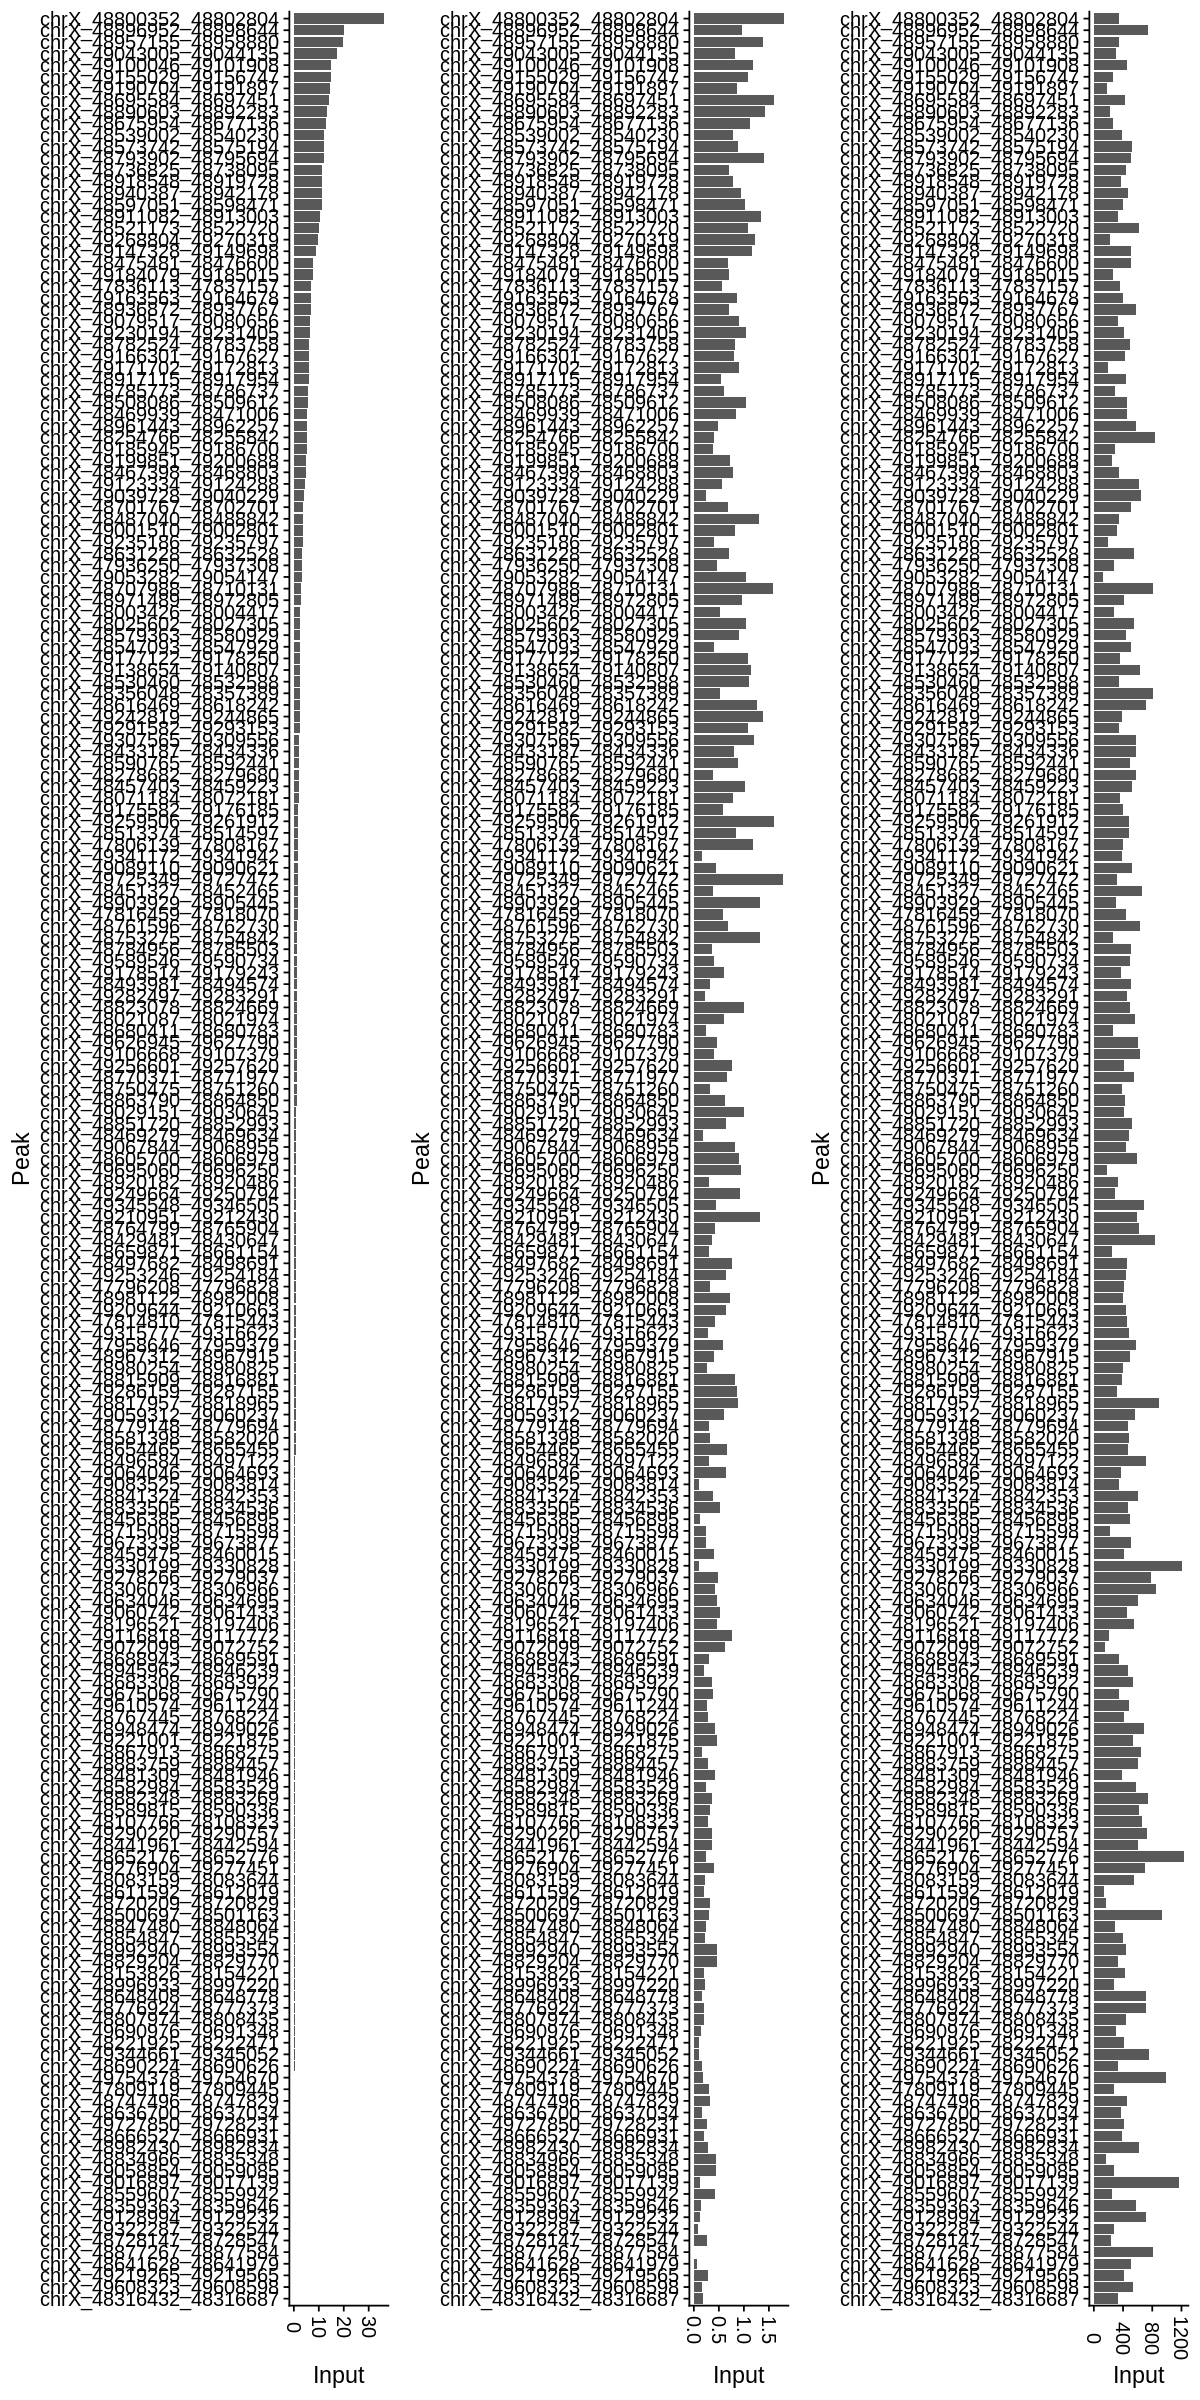

In [6]:
lst_dat = list(dat_sub_astarr, dat_sub_wstarr, dat_sub_tmpra)

lst_gpt = lapply(seq_along(lst_dat), function(idx){
    dat = lst_dat[[idx]]
    dat$Peak = factor(dat$Peak, levels=rev(peaks))

    gpt = ggplot(dat, aes(x=Input, y=Peak)) + 
        geom_histogram(stat="identity") + 
        theme_cowplot() + 
        theme(axis.text.x = element_text(vjust=0.5, angle=270))
    return(gpt)
})

options(repr.plot.height=20, repr.plot.width=10)
plot_grid(
    lst_gpt[[1]], 
    lst_gpt[[2]], 
    lst_gpt[[3]], 
    nrow = 1, align = "h")

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


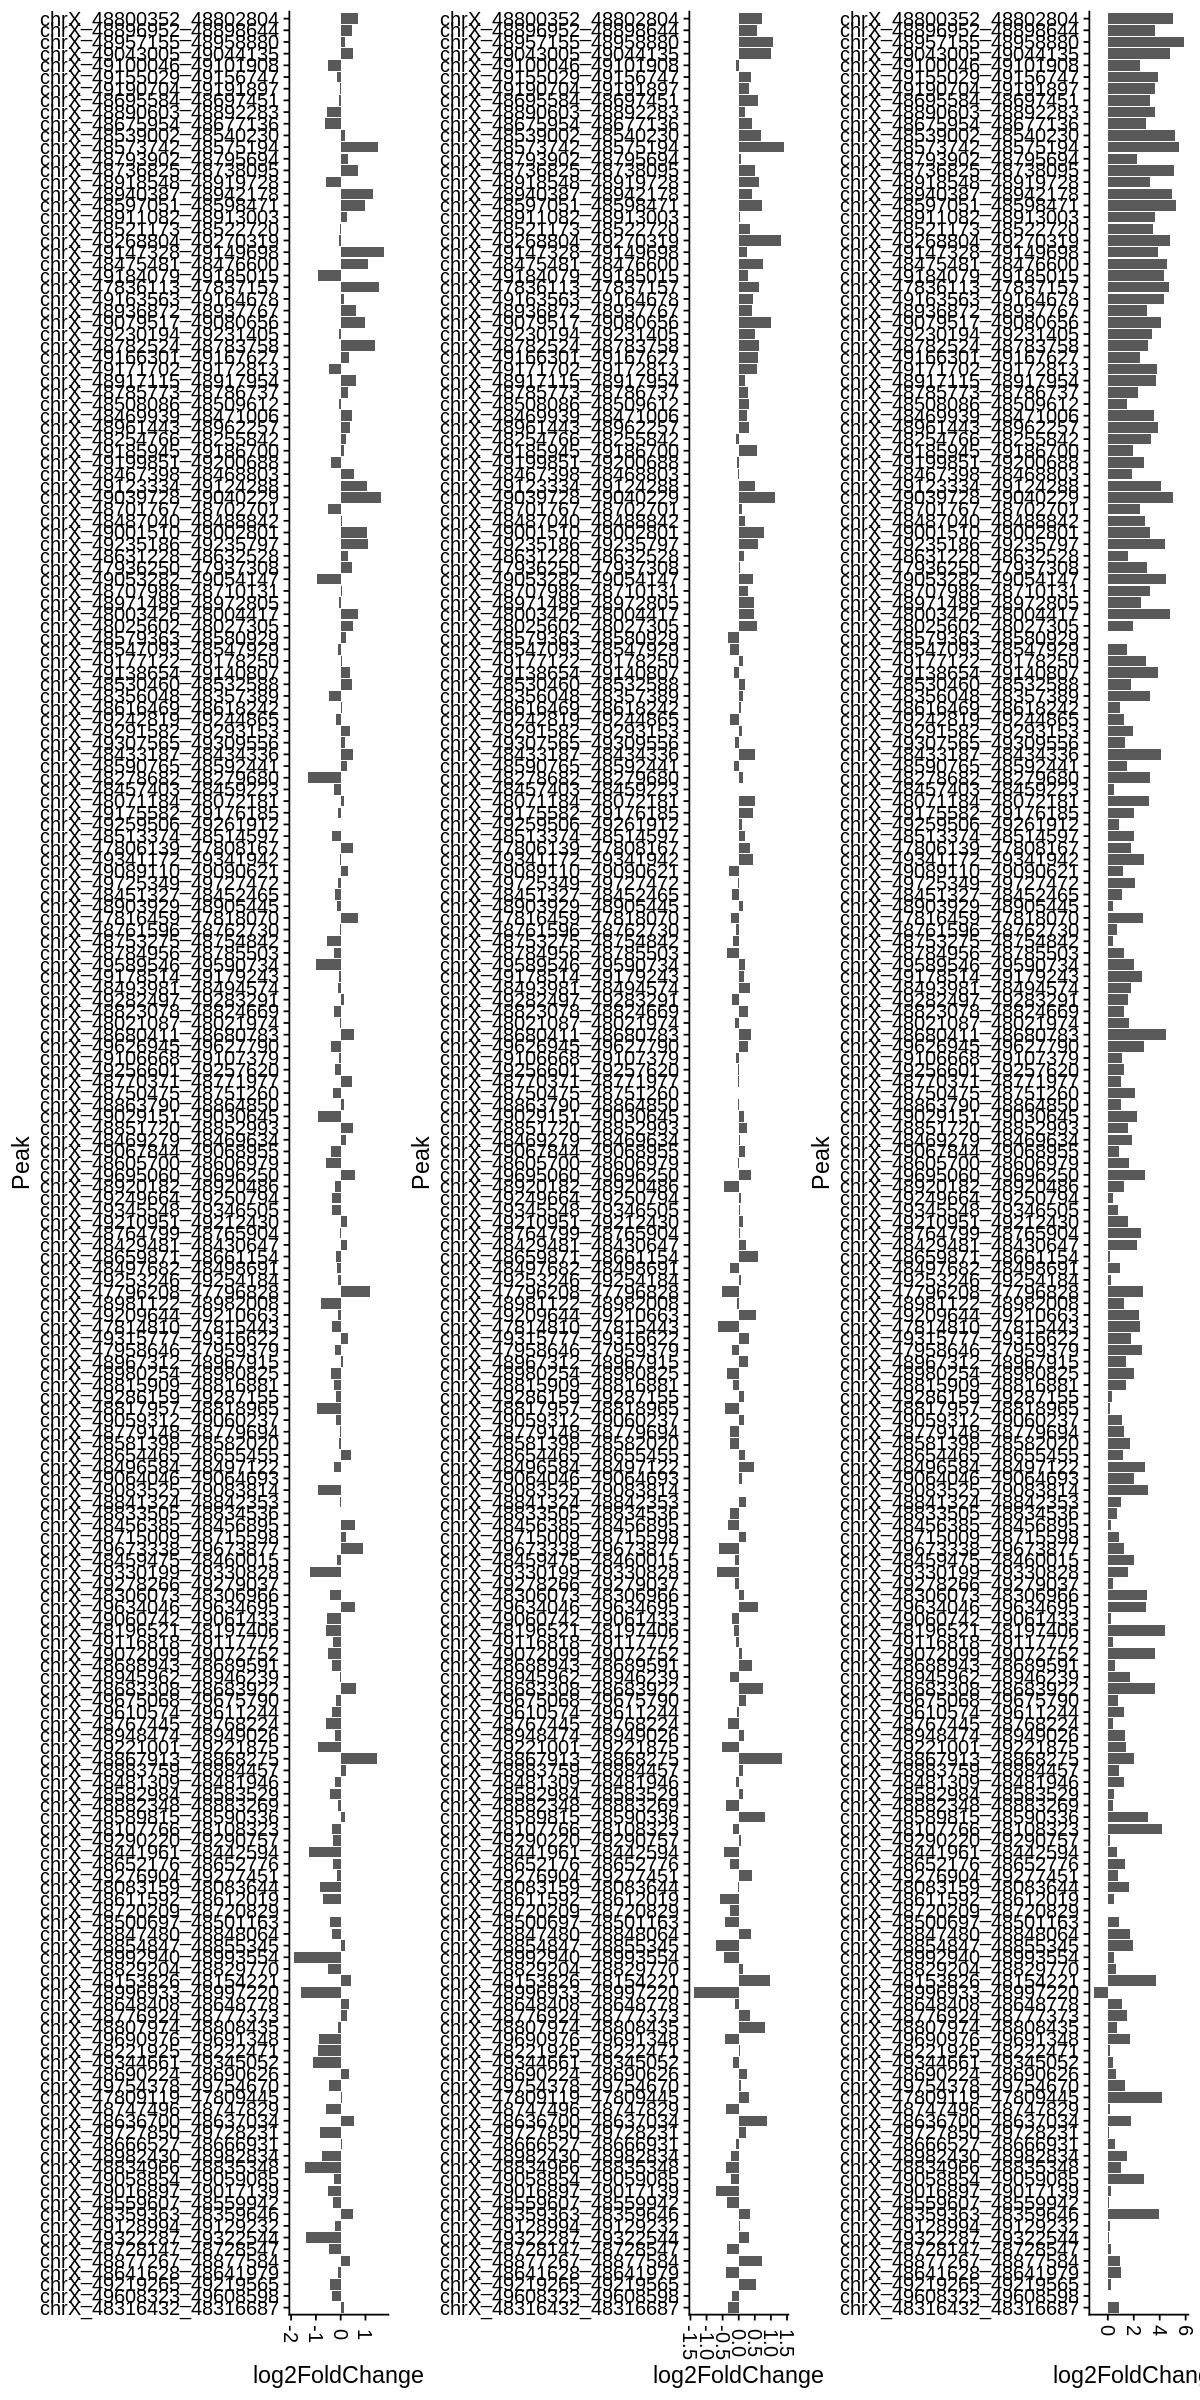

In [7]:
lst_dat = list(dat_sub_astarr, dat_sub_wstarr, dat_sub_tmpra)

lst_gpt = lapply(seq_along(lst_dat), function(idx){
    dat = lst_dat[[idx]]
    dat$Peak = factor(dat$Peak, levels=rev(peaks))

    gpt = ggplot(dat, aes(x=log2FoldChange, y=Peak)) + 
        geom_histogram(stat="identity") + 
        theme_cowplot() + 
        theme(axis.text.x = element_text(vjust=0.5, angle=270))
    return(gpt)
})

options(repr.plot.height=20, repr.plot.width=10)
plot_grid(
    lst_gpt[[1]], 
    lst_gpt[[2]], 
    lst_gpt[[3]], 
    nrow = 1, align = "h")

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 1 rows containing missing values (position_stack).”


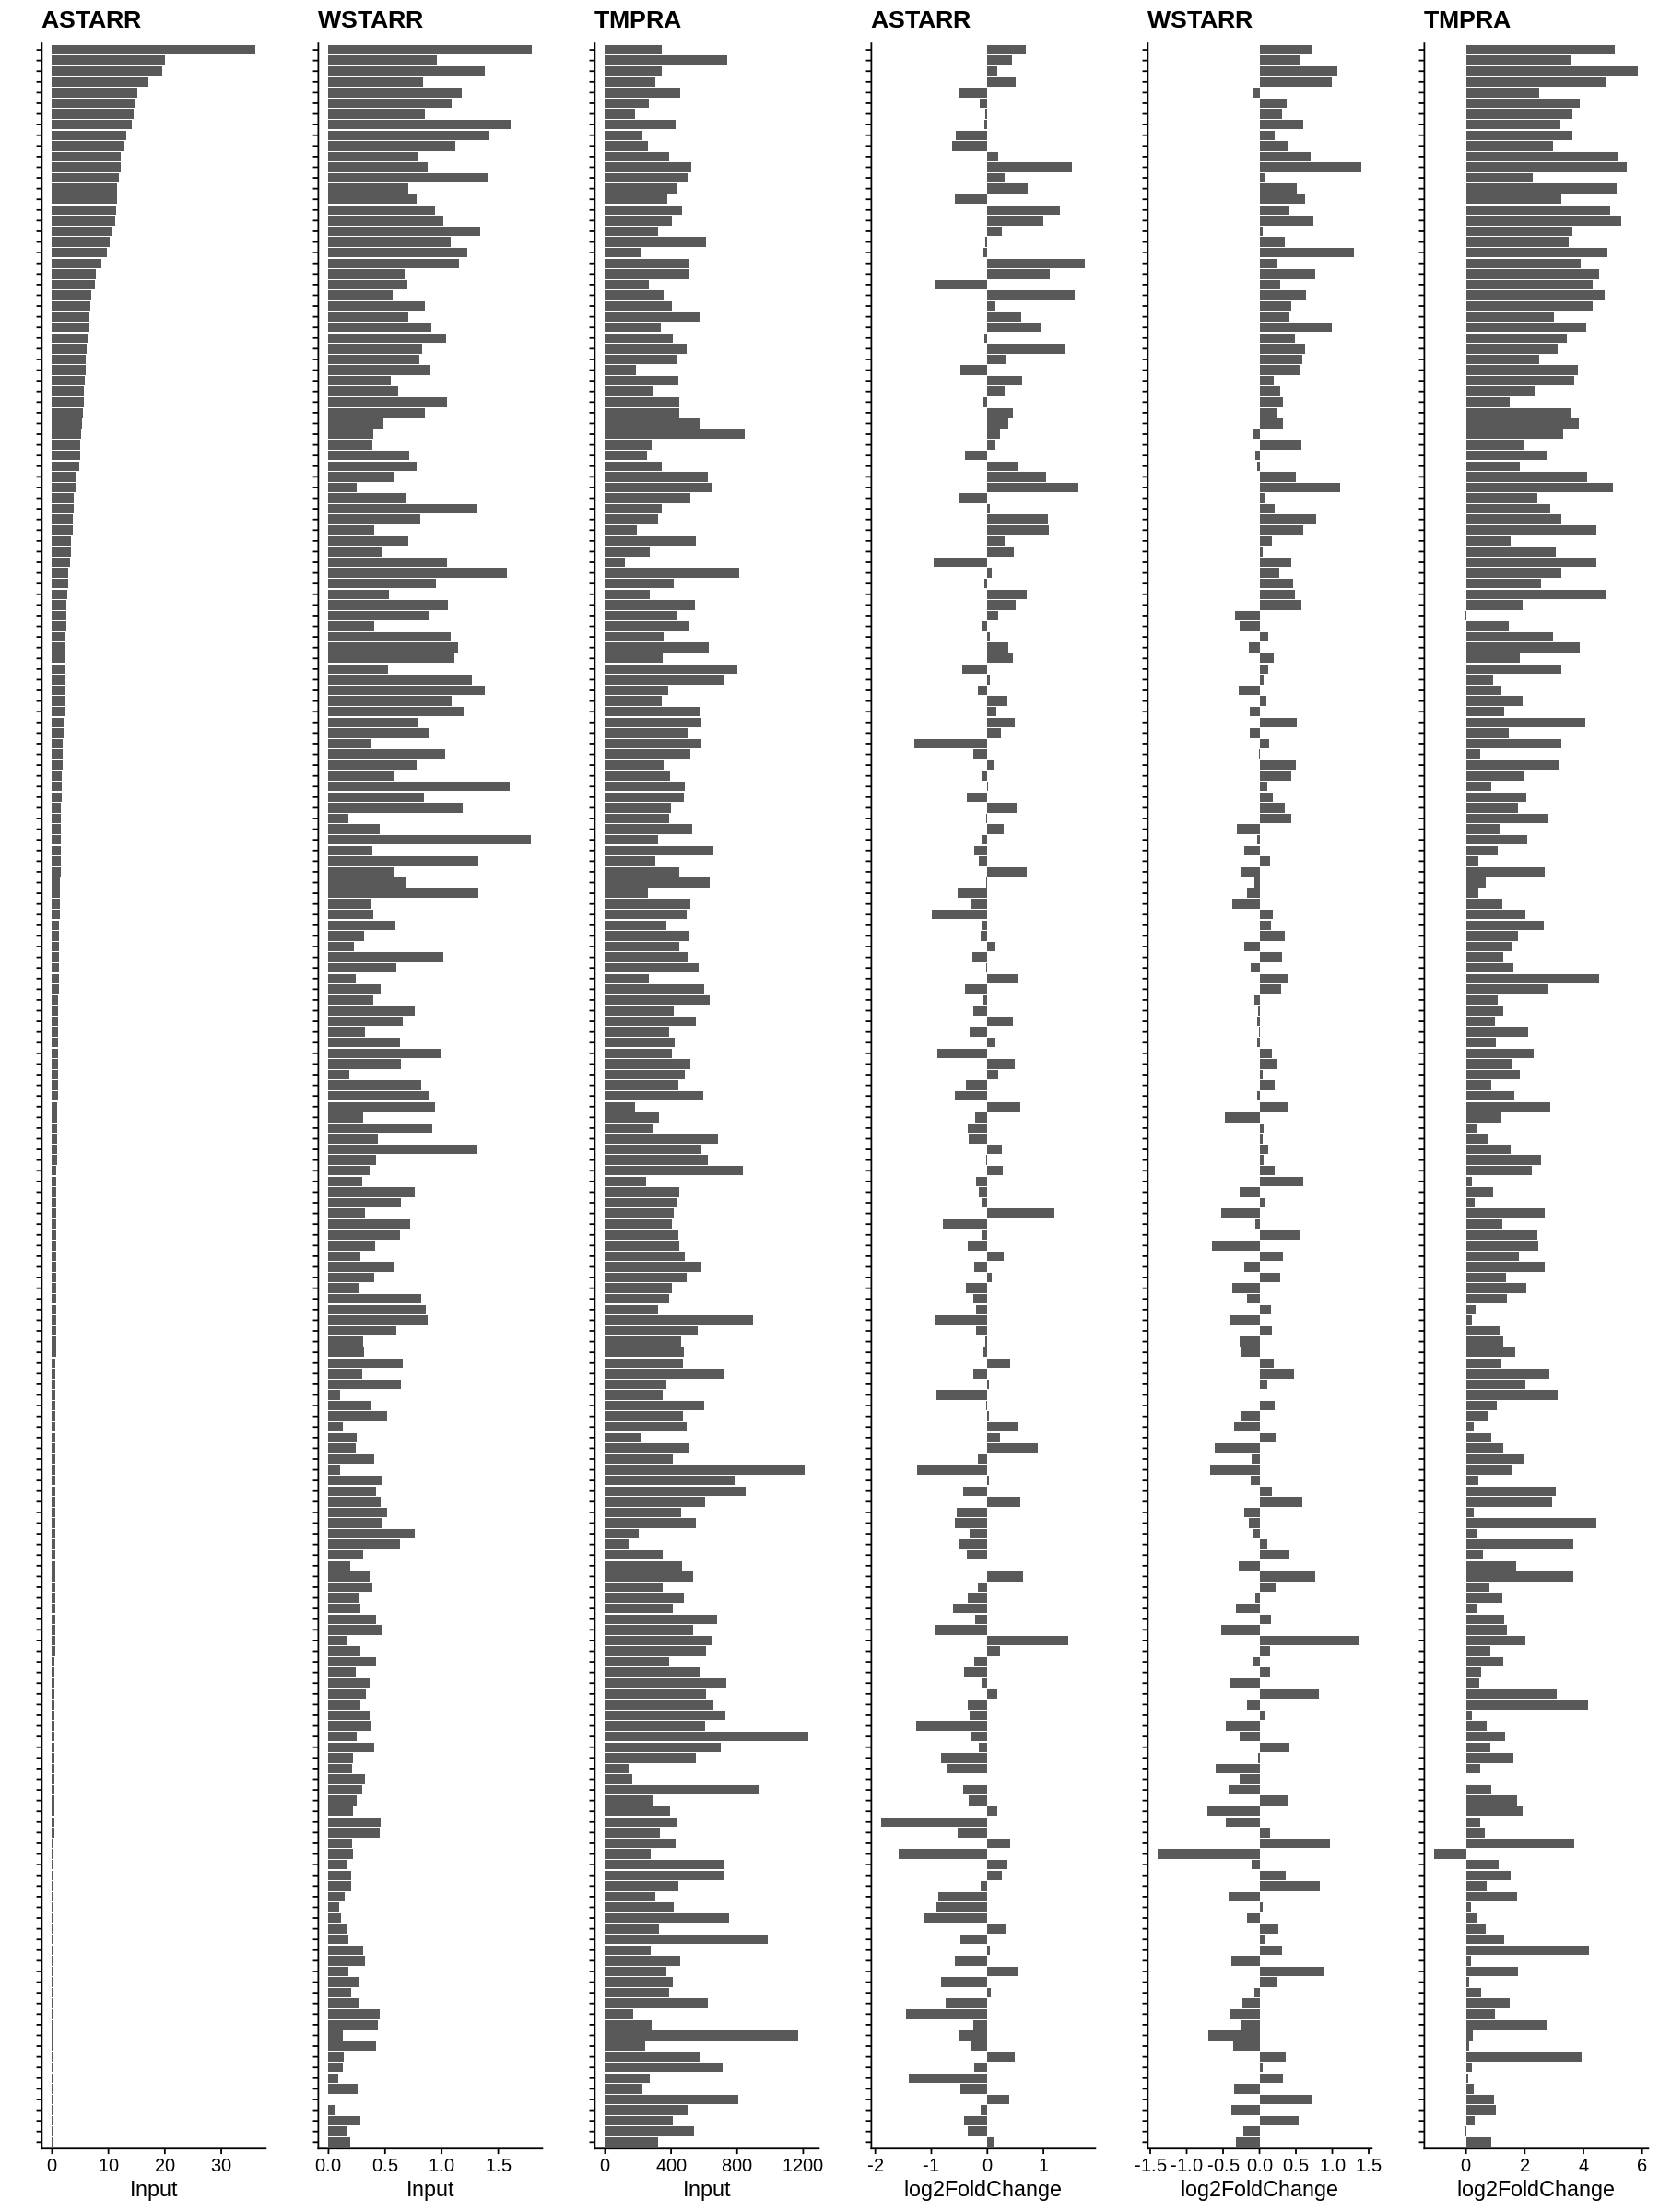

In [8]:
lst_dat = list(dat_sub_astarr, dat_sub_wstarr, dat_sub_tmpra)
labels  = c("ASTARR", "WSTARR", "TMPRA")

lst_gpt_inp = lapply(seq_along(lst_dat), function(idx){
    lab = labels[idx]
    dat = lst_dat[[idx]]
    dat$Peak = factor(dat$Peak, levels=rev(peaks))

    gpt = ggplot(dat, aes(x=Input, y=Peak)) + 
        geom_histogram(stat="identity") + 
        labs(y="", title=lab) +
        theme_cowplot() + 
        theme(axis.text.y=element_blank())
    return(gpt)
})

lst_gpt_out = lapply(seq_along(lst_dat), function(idx){
    lab = labels[idx]
    dat = lst_dat[[idx]]
    dat$Peak = factor(dat$Peak, levels=rev(peaks))

    gpt = ggplot(dat, aes(x=log2FoldChange, y=Peak)) + 
        geom_histogram(stat="identity") + 
        labs(y="", title=lab) +
        theme_cowplot() + 
        theme(axis.text.y=element_blank())
    return(gpt)
})

options(repr.plot.height=20, repr.plot.width=15)
plot_grid(
    lst_gpt_inp[[1]], 
    lst_gpt_inp[[2]], 
    lst_gpt_inp[[3]], 
    lst_gpt_out[[1]], 
    lst_gpt_out[[2]], 
    lst_gpt_out[[3]], 
    nrow = 1, align = "h")

In [9]:
dat1 = dat_sub_astarr %>% dplyr::select(Peak, log2FoldChange) %>% dplyr::mutate(Assay="ASTARR")
dat2 = dat_sub_wstarr %>% dplyr::select(Peak, log2FoldChange) %>% dplyr::mutate(Assay="WSTARR")
dat3 = dat_sub_tmpra  %>% dplyr::select(Peak, log2FoldChange) %>% dplyr::mutate(Assay="TMPRA")

dat  = bind_rows(dat1, dat2, dat3) %>% spread(Assay, log2FoldChange)
head(dat)

Peak,ASTARR,TMPRA,WSTARR
<chr>,<dbl>,<dbl>,<dbl>
chrX_47796208_47796828,1.1959695,2.685728,-0.5282714
chrX_47806139_47808167,0.5153769,1.755022,0.3504855
chrX_47809119_47809445,0.0440647,4.172795,0.3139379
chrX_47814810_47815443,-0.3486922,2.458260,-0.6528927
chrX_47816459_47818070,0.6939760,2.674639,-0.2475950
chrX_47836113_47837157,1.5604495,4.719739,0.6419385


In [15]:
fit = lm(WSTARR~ASTARR, data=dat)
print(cor(dat$WSTARR, dat$ASTARR))
summary(fit)

[1] 0.4988322



Call:
lm(formula = WSTARR ~ ASTARR, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0886 -0.2404  0.0042  0.2376  1.1778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.14447    0.02606   5.545 9.49e-08 ***
ASTARR       0.34776    0.04327   8.037 8.64e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3652 on 195 degrees of freedom
Multiple R-squared:  0.2488,	Adjusted R-squared:  0.245 
F-statistic:  64.6 on 1 and 195 DF,  p-value: 8.635e-14


`geom_smooth()` using formula 'y ~ x'



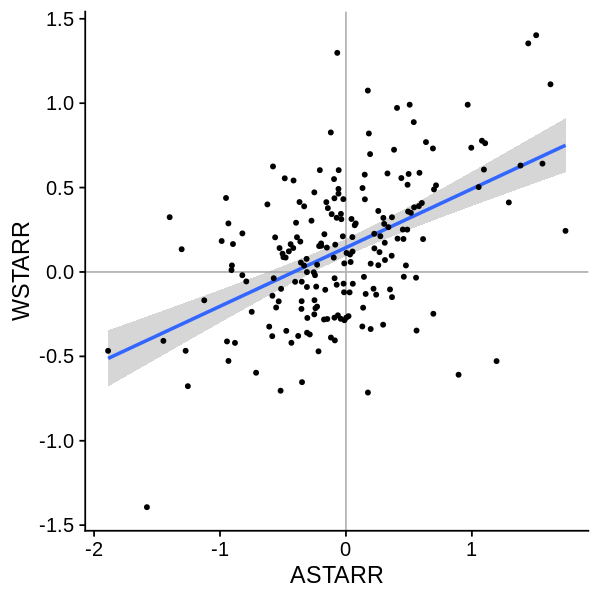

In [10]:
gpt = ggplot(dat, aes(x=ASTARR, y=WSTARR)) + 
    geom_vline(xintercept = 0, color="grey70") +
    geom_hline(yintercept = 0, color="grey70") +
    geom_smooth(method = "lm") +
    geom_point(size=1) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [17]:
fit = lm(TMPRA~ASTARR, data=dat)
print(cor(dat$TMPRA, dat$ASTARR))
summary(fit)

[1] 0.4643574



Call:
lm(formula = TMPRA ~ ASTARR, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4796 -1.0227 -0.2665  0.9509  3.5649 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.10418    0.09188  22.901  < 2e-16 ***
ASTARR       1.11709    0.15257   7.322 6.28e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.288 on 195 degrees of freedom
Multiple R-squared:  0.2156,	Adjusted R-squared:  0.2116 
F-statistic: 53.61 on 1 and 195 DF,  p-value: 6.277e-12


`geom_smooth()` using formula 'y ~ x'



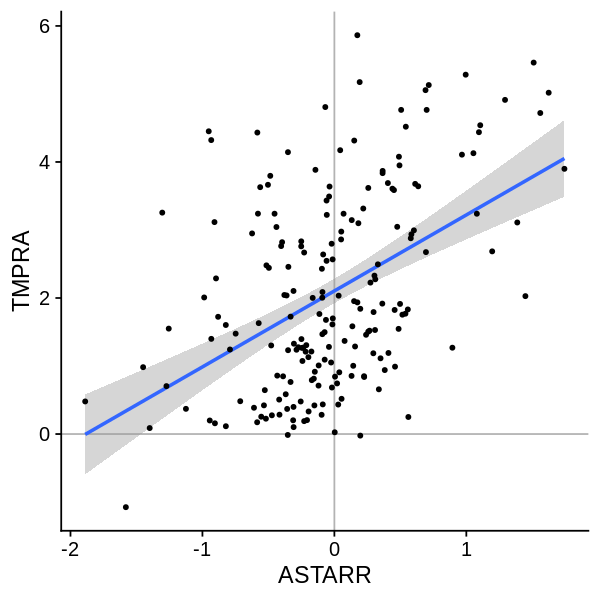

In [18]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA)) + 
    geom_vline(xintercept = 0, color="grey70") +
    geom_hline(yintercept = 0, color="grey70") +
    geom_smooth(method = "lm") +
    geom_point(size=1) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [19]:
fit = lm(TMPRA~WSTARR, data=dat)
print(cor(dat$TMPRA, dat$WSTARR))
summary(fit)

[1] 0.5848339



Call:
lm(formula = TMPRA ~ WSTARR, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.81248 -0.85865 -0.04895  0.88167  2.91679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.79976    0.08821   20.40   <2e-16 ***
WSTARR       2.01812    0.20045   10.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.18 on 195 degrees of freedom
Multiple R-squared:  0.342,	Adjusted R-squared:  0.3387 
F-statistic: 101.4 on 1 and 195 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



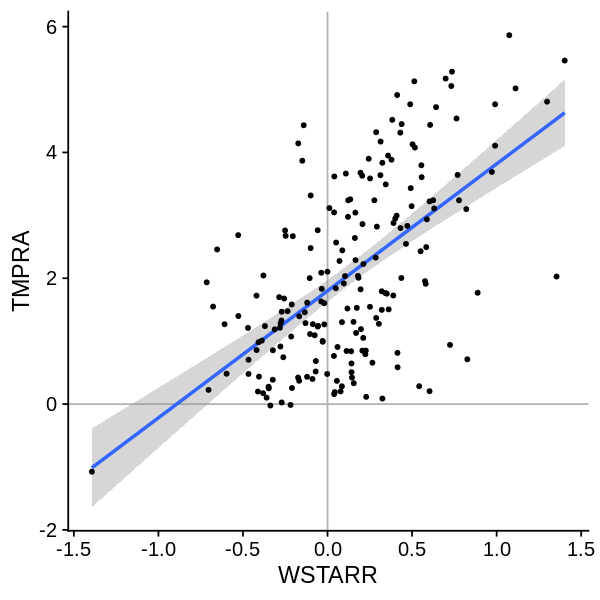

In [20]:
gpt = ggplot(dat, aes(x=WSTARR, y=TMPRA)) + 
    geom_vline(xintercept = 0, color="grey70") +
    geom_hline(yintercept = 0, color="grey70") +
    geom_smooth(method = "lm") +
    geom_point(size=1) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

## MYC

In [21]:
dat = dat_cov_tmpra %>% dplyr::filter(Region == "MYC")
lst = list(
    "ASTARR" = dat_cov_astarr$Peak, 
    "WSTARR" = dat_cov_wstarr$Peak, 
    "TMPRA"  = dat$Peak)

peaks = unique(Reduce(intersect, lst))
dat_sub_astarr = dat_cov_astarr %>% dplyr::filter(Peak %in% peaks)
dat_sub_wstarr = dat_cov_wstarr %>% dplyr::filter(Peak %in% peaks)
dat_sub_tmpra  = dat_cov_tmpra  %>% dplyr::filter(Peak %in% peaks)

dat  = dat_sub_astarr %>% arrange(-Input)
#dat  = dat_sub_astarr %>% arrange(-log2FoldChange)
peaks = dat$Peak
print(length(peaks))

[1] 188


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


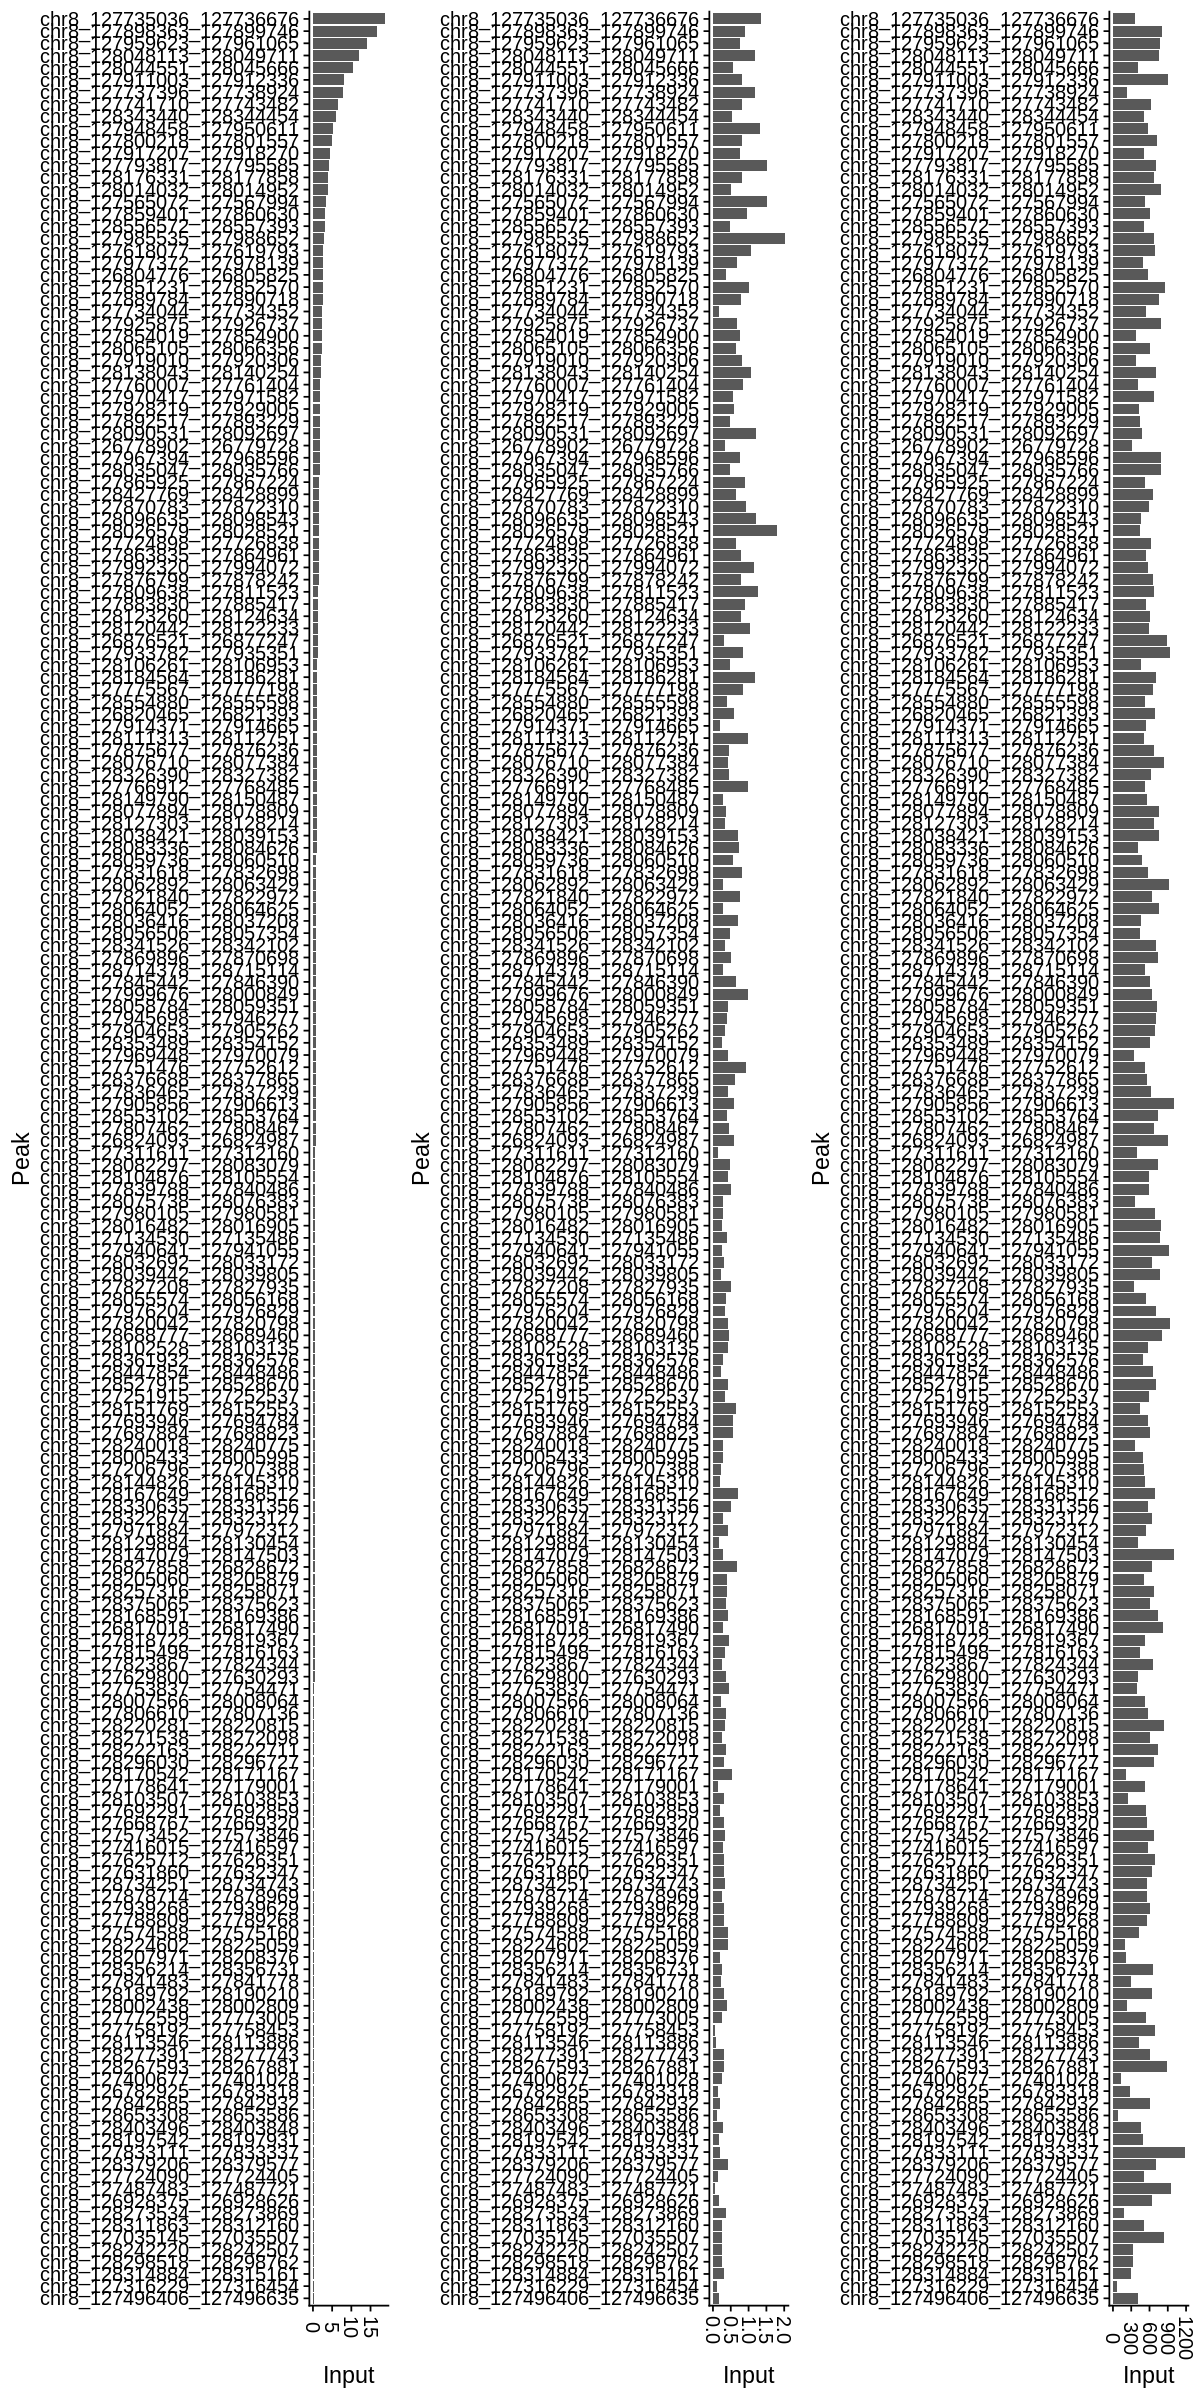

In [22]:
lst_dat = list(dat_sub_astarr, dat_sub_wstarr, dat_sub_tmpra)

lst_gpt = lapply(seq_along(lst_dat), function(idx){
    dat = lst_dat[[idx]]
    dat$Peak = factor(dat$Peak, levels=rev(peaks))

    gpt = ggplot(dat, aes(x=Input, y=Peak)) + 
        geom_histogram(stat="identity") + 
        theme_cowplot() + 
        theme(axis.text.x = element_text(vjust=0.5, angle=270))
    return(gpt)
})

options(repr.plot.height=20, repr.plot.width=10)
plot_grid(
    lst_gpt[[1]], 
    lst_gpt[[2]], 
    lst_gpt[[3]], 
    nrow = 1, align = "h")

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


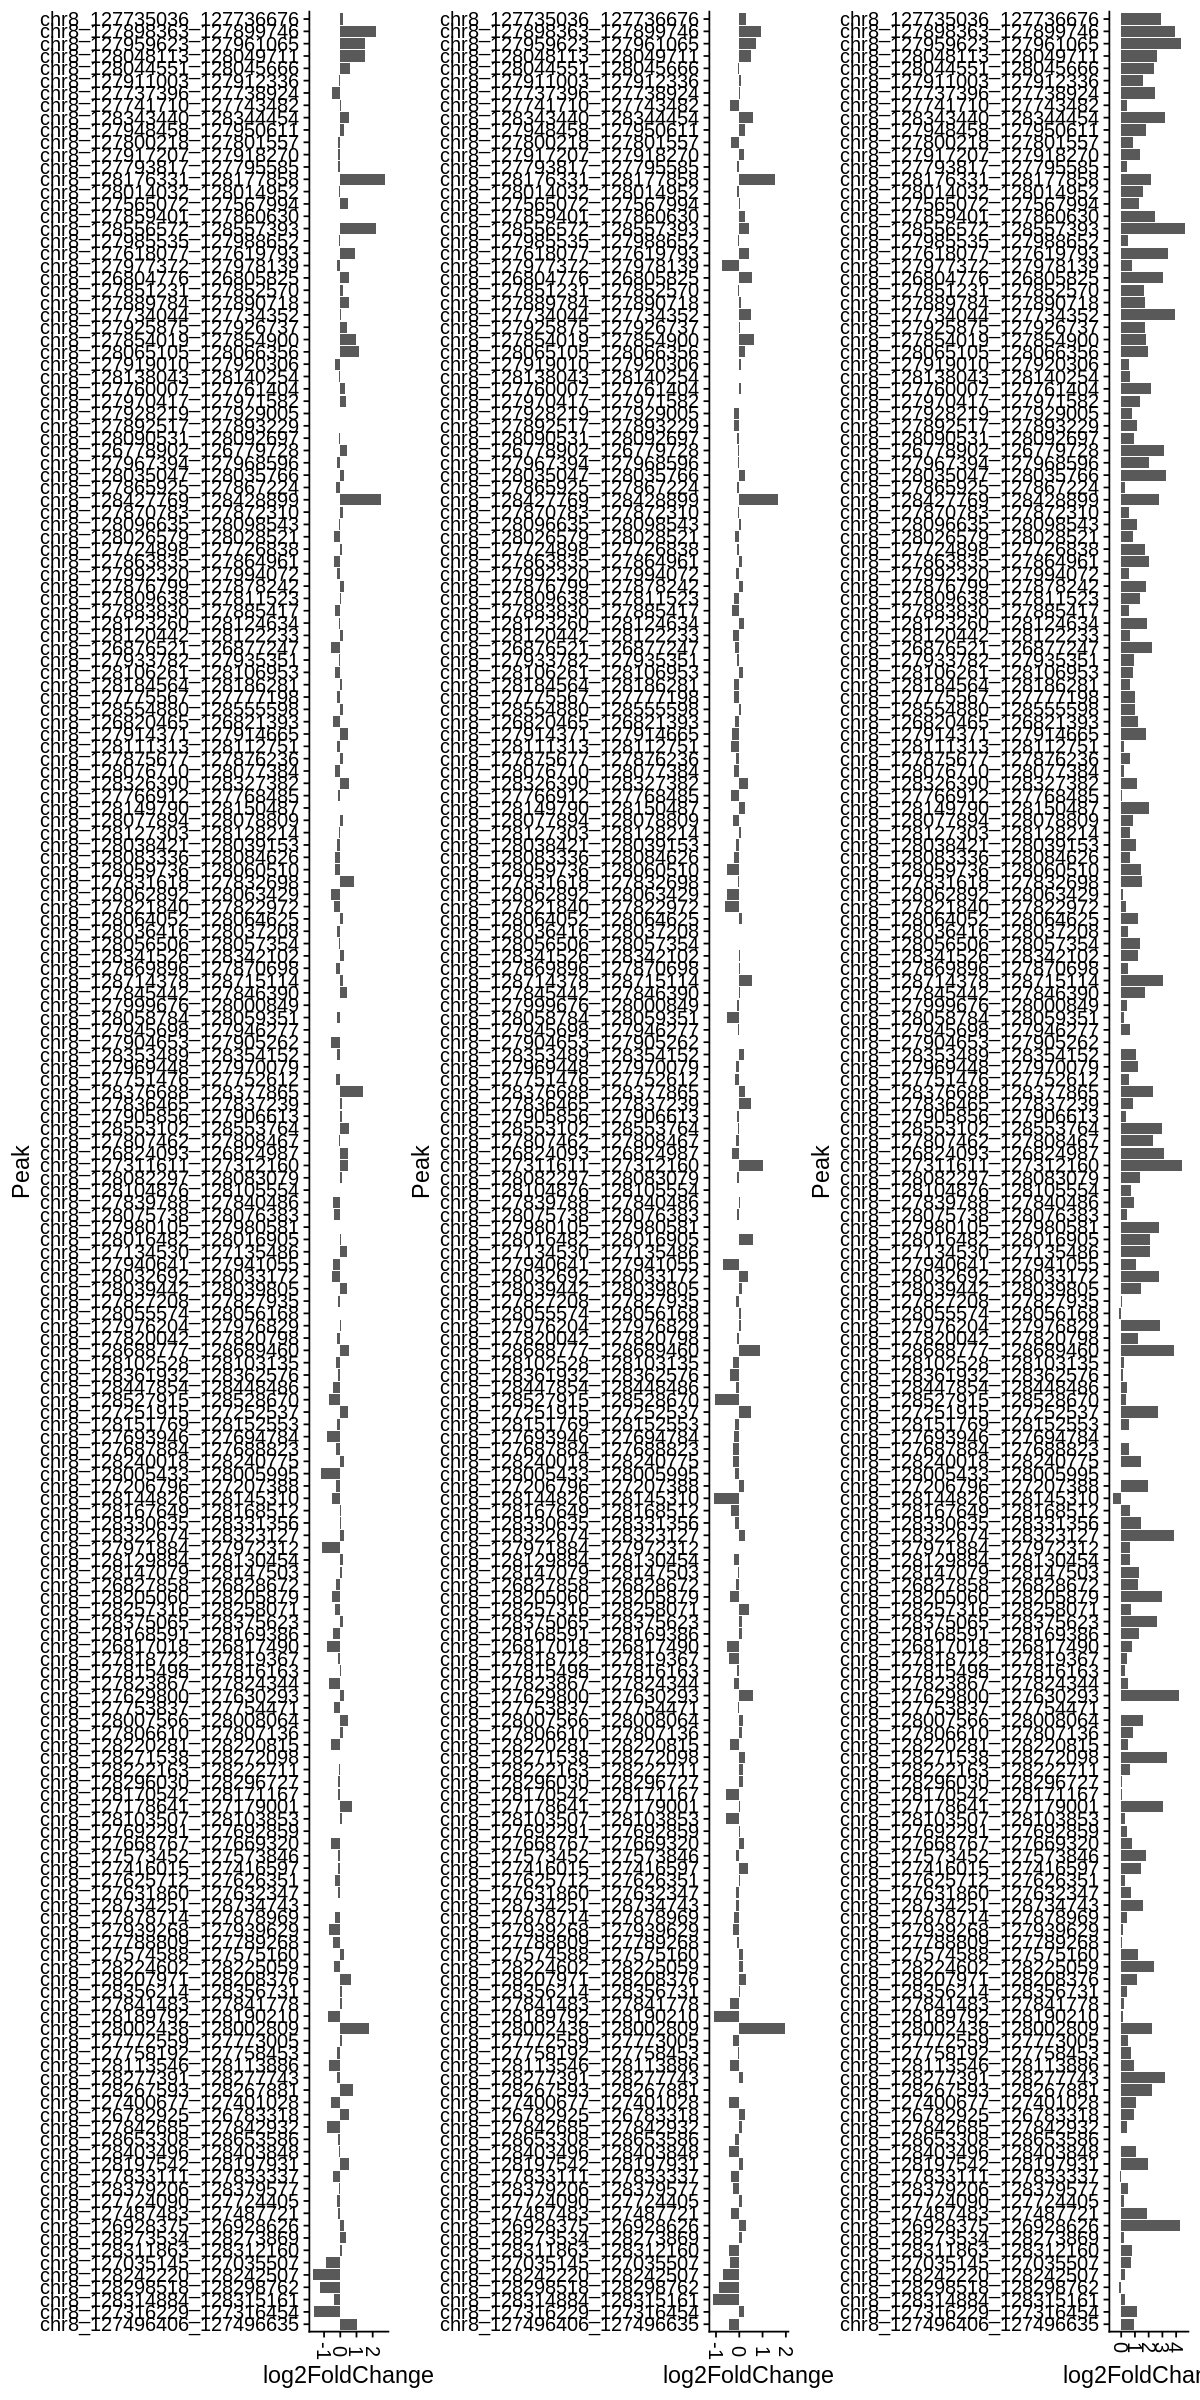

In [23]:
lst_dat = list(dat_sub_astarr, dat_sub_wstarr, dat_sub_tmpra)

lst_gpt = lapply(seq_along(lst_dat), function(idx){
    dat = lst_dat[[idx]]
    dat$Peak = factor(dat$Peak, levels=rev(peaks))

    gpt = ggplot(dat, aes(x=log2FoldChange, y=Peak)) + 
        geom_histogram(stat="identity") + 
        theme_cowplot() + 
        theme(axis.text.x = element_text(vjust=0.5, angle=270))
    return(gpt)
})

options(repr.plot.height=20, repr.plot.width=10)
plot_grid(
    lst_gpt[[1]], 
    lst_gpt[[2]], 
    lst_gpt[[3]], 
    nrow = 1, align = "h")

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


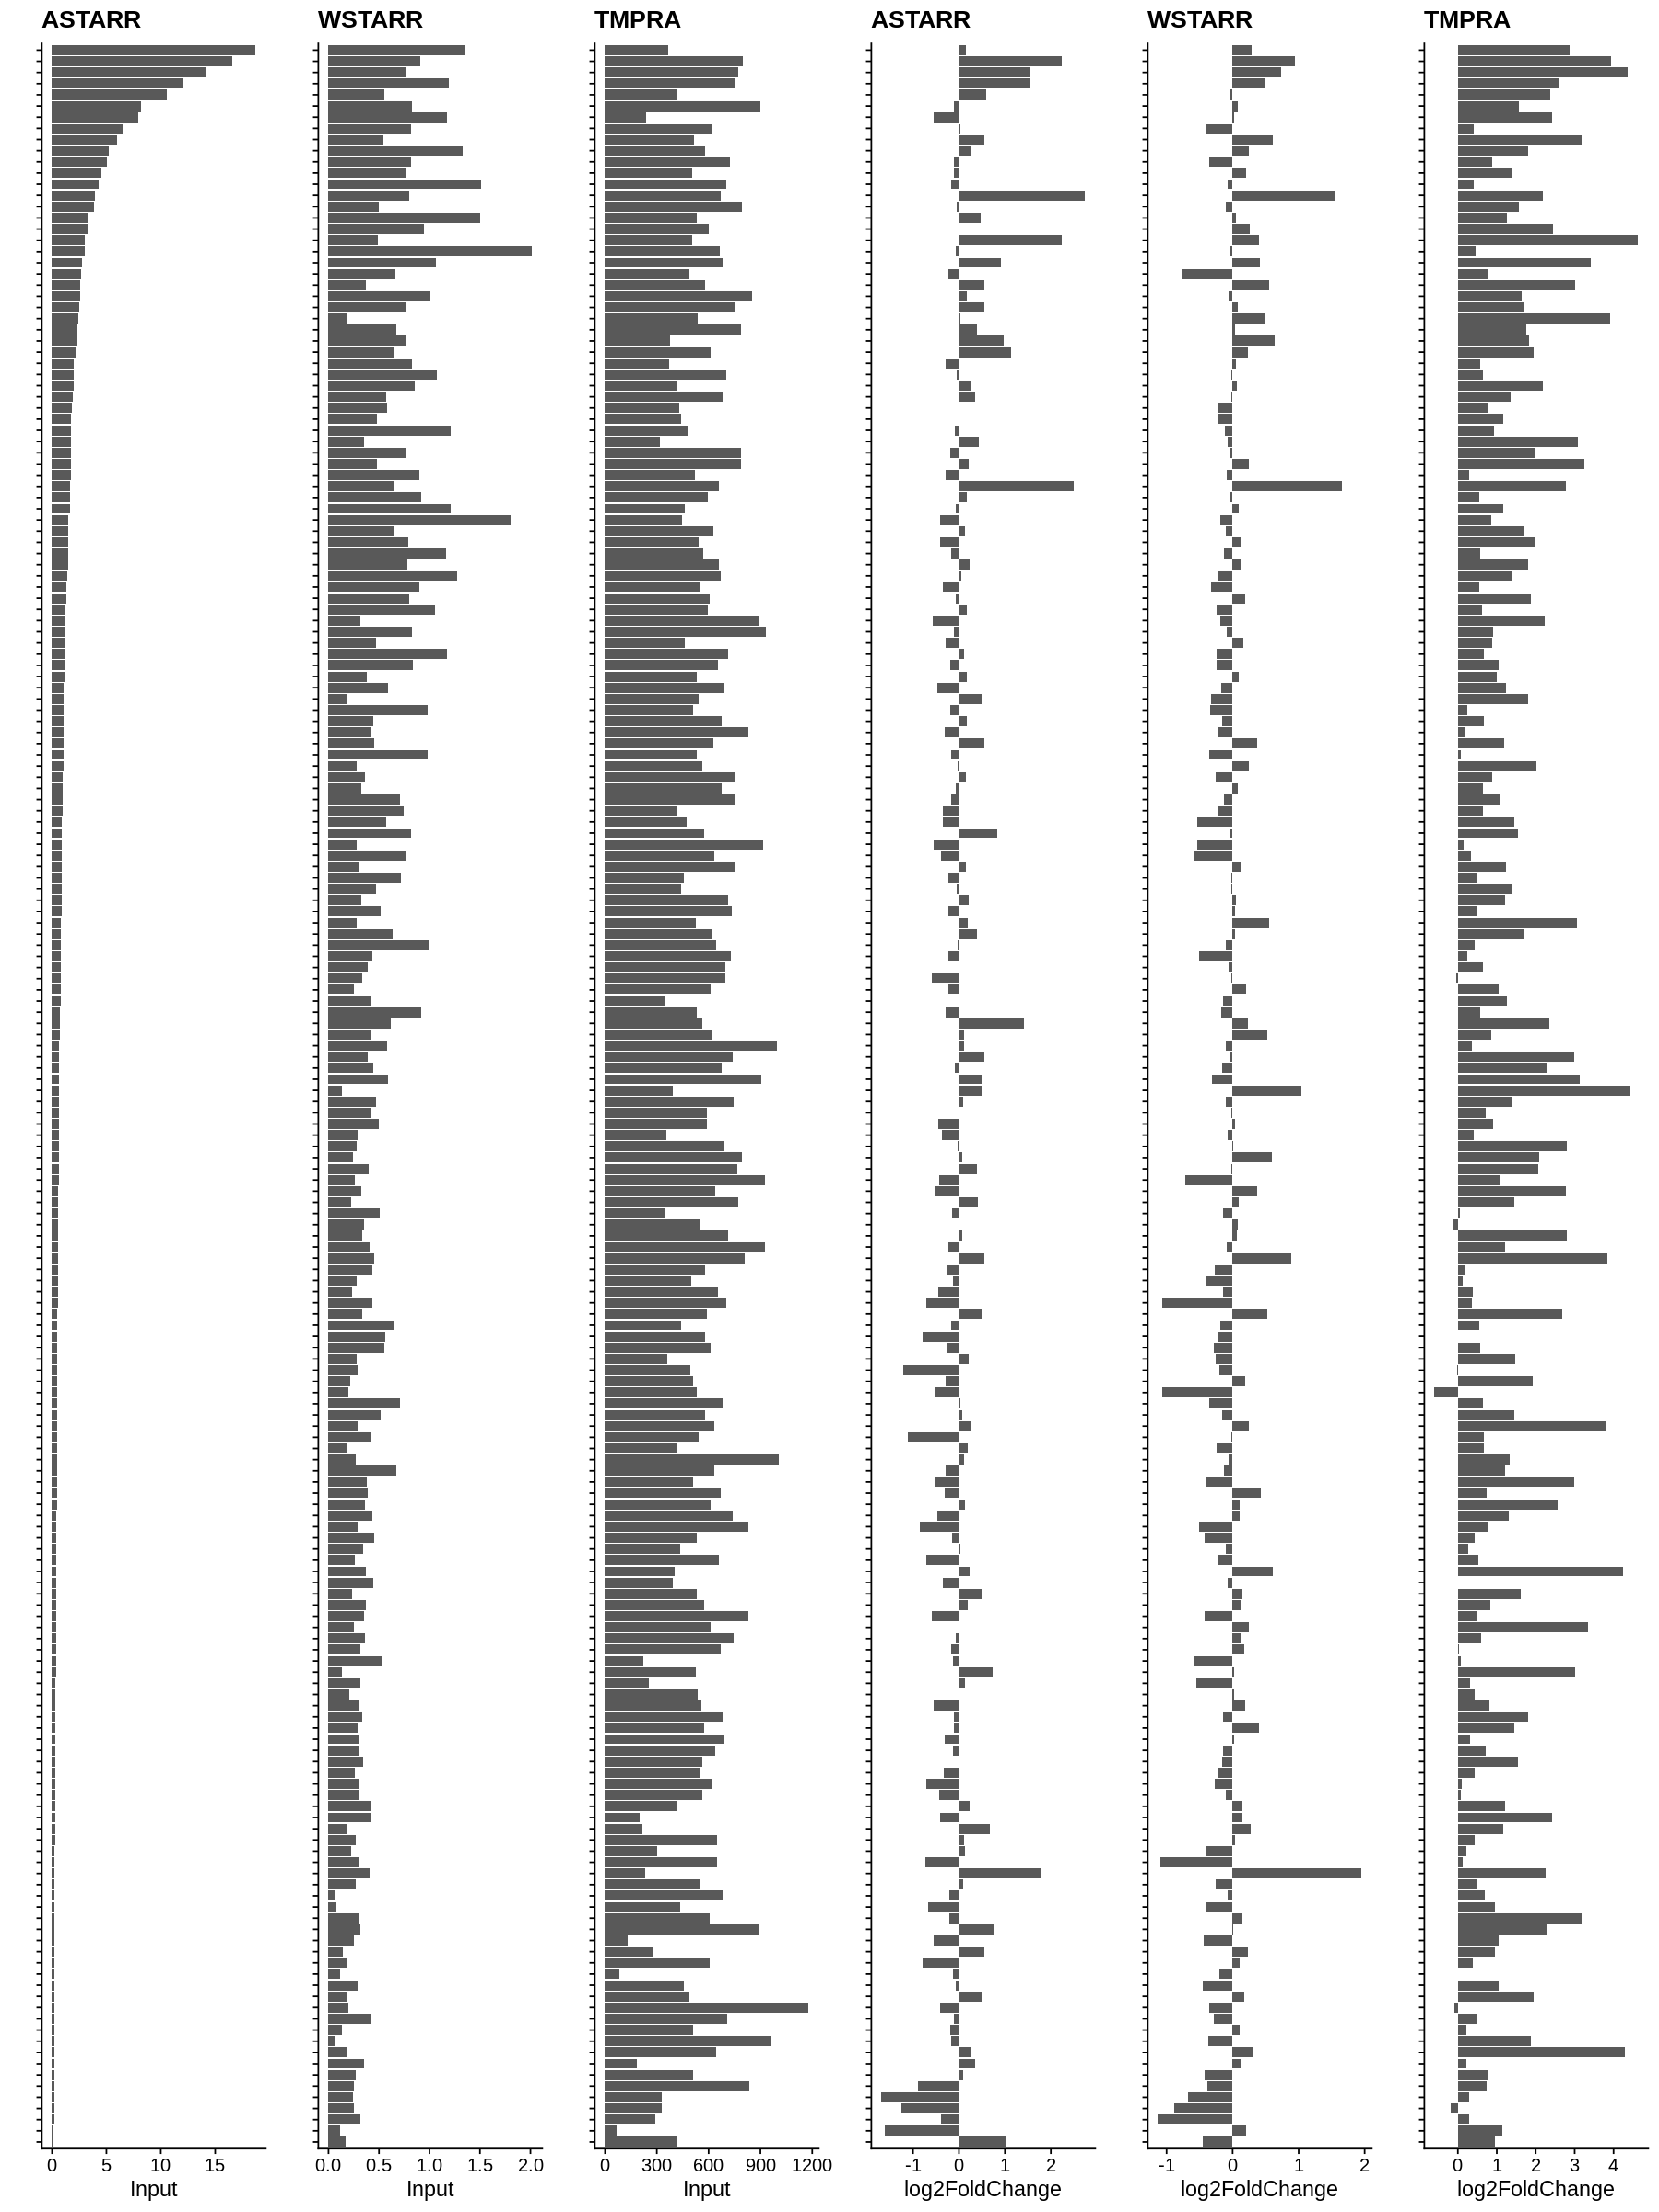

In [24]:
lst_dat = list(dat_sub_astarr, dat_sub_wstarr, dat_sub_tmpra)
labels  = c("ASTARR", "WSTARR", "TMPRA")

lst_gpt_inp = lapply(seq_along(lst_dat), function(idx){
    lab = labels[idx]
    dat = lst_dat[[idx]]
    dat$Peak = factor(dat$Peak, levels=rev(peaks))

    gpt = ggplot(dat, aes(x=Input, y=Peak)) + 
        geom_histogram(stat="identity") + 
        labs(y="", title=lab) +
        theme_cowplot() + 
        theme(axis.text.y=element_blank())
    return(gpt)
})

lst_gpt_out = lapply(seq_along(lst_dat), function(idx){
    lab = labels[idx]
    dat = lst_dat[[idx]]
    dat$Peak = factor(dat$Peak, levels=rev(peaks))

    gpt = ggplot(dat, aes(x=log2FoldChange, y=Peak)) + 
        geom_histogram(stat="identity") + 
        labs(y="", title=lab) +
        theme_cowplot() + 
        theme(axis.text.y=element_blank())
    return(gpt)
})

options(repr.plot.height=20, repr.plot.width=15)
plot_grid(
    lst_gpt_inp[[1]], 
    lst_gpt_inp[[2]], 
    lst_gpt_inp[[3]], 
    lst_gpt_out[[1]], 
    lst_gpt_out[[2]], 
    lst_gpt_out[[3]], 
    nrow = 1, align = "h")

In [26]:
dat1 = dat_sub_astarr %>% dplyr::select(Peak, log2FoldChange) %>% dplyr::mutate(Assay="ASTARR")
dat2 = dat_sub_wstarr %>% dplyr::select(Peak, log2FoldChange) %>% dplyr::mutate(Assay="WSTARR")
dat3 = dat_sub_tmpra  %>% dplyr::select(Peak, log2FoldChange) %>% dplyr::mutate(Assay="TMPRA")

dat  = bind_rows(dat1, dat2, dat3) %>% spread(Assay, log2FoldChange)
head(dat)

Peak,ASTARR,TMPRA,WSTARR
<chr>,<dbl>,<dbl>,<dbl>
chr8_126778902_126779728,0.4248381,3.0823673,-0.0741314
chr8_126782925_126783318,0.5611154,0.9428046,0.2312918
chr8_126804776_126805825,0.5479907,3.0095737,0.5462629
chr8_126817018_126817490,-0.8449595,0.7953574,-0.5126171
chr8_126820465_126821393,-0.4738180,1.2328392,-0.1796884
chr8_126824093_126824987,0.4855128,3.1341376,-0.3160036


In [27]:
fit = lm(WSTARR~ASTARR, data=dat)
print(cor(dat$WSTARR, dat$ASTARR))
summary(fit)

[1] 0.6356881



Call:
lm(formula = WSTARR ~ ASTARR, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92957 -0.16867 -0.01601  0.16813  1.22630 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03359    0.02329  -1.443    0.151    
ASTARR       0.43054    0.03834  11.231   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3191 on 186 degrees of freedom
Multiple R-squared:  0.4041,	Adjusted R-squared:  0.4009 
F-statistic: 126.1 on 1 and 186 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



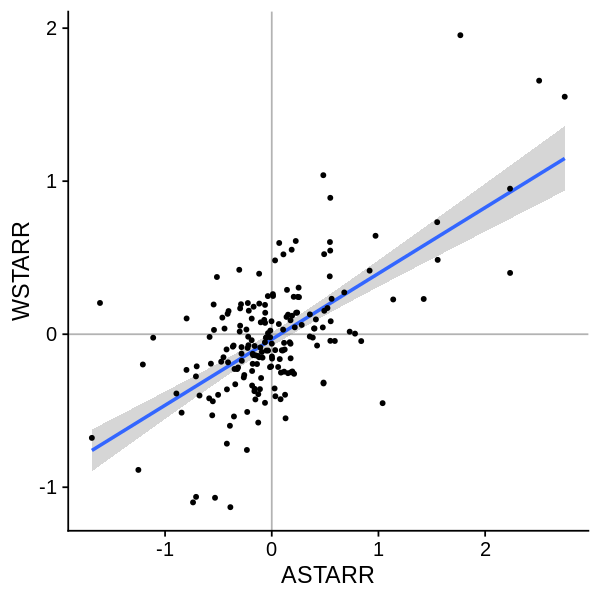

In [28]:
gpt = ggplot(dat, aes(x=ASTARR, y=WSTARR)) + 
    geom_vline(xintercept = 0, color="grey70") +
    geom_hline(yintercept = 0, color="grey70") +
    geom_smooth(method = "lm") +
    geom_point(size=1) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [29]:
fit = lm(TMPRA~ASTARR, data=dat)
print(cor(dat$TMPRA, dat$ASTARR))
summary(fit)

[1] 0.5387688



Call:
lm(formula = TMPRA ~ ASTARR, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7738 -0.6509 -0.2277  0.4116  2.7549 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.30088    0.06759  19.247  < 2e-16 ***
ASTARR       0.97053    0.11127   8.722 1.52e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9262 on 186 degrees of freedom
Multiple R-squared:  0.2903,	Adjusted R-squared:  0.2865 
F-statistic: 76.07 on 1 and 186 DF,  p-value: 1.518e-15


`geom_smooth()` using formula 'y ~ x'



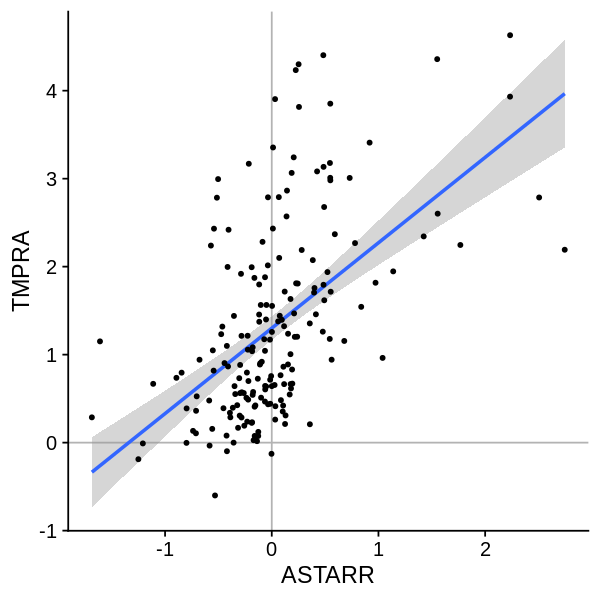

In [30]:
gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA)) + 
    geom_vline(xintercept = 0, color="grey70") +
    geom_hline(yintercept = 0, color="grey70") +
    geom_smooth(method = "lm") +
    geom_point(size=1) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

In [33]:
fit = lm(TMPRA~WSTARR, data=dat)
print(cor(dat$TMPRA, dat$WSTARR))
summary(fit)

[1] 0.5878965



Call:
lm(formula = TMPRA ~ WSTARR, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1683 -0.6266 -0.1646  0.5036  2.6442 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.35959    0.06498  20.923   <2e-16 ***
WSTARR       1.56364    0.15776   9.912   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8894 on 186 degrees of freedom
Multiple R-squared:  0.3456,	Adjusted R-squared:  0.3421 
F-statistic: 98.24 on 1 and 186 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



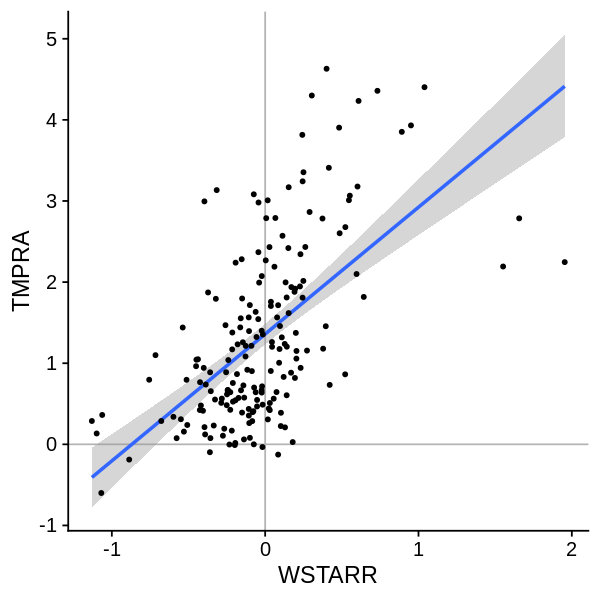

In [34]:
gpt = ggplot(dat, aes(x=WSTARR, y=TMPRA)) + 
    geom_vline(xintercept = 0, color="grey70") +
    geom_hline(yintercept = 0, color="grey70") +
    geom_smooth(method = "lm") +
    geom_point(size=1) + 
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

## Merge

In [35]:
dat = dat_cov_tmpra %>% dplyr::filter(Region %in% c("GATA1", "MYC"))
lst = list(
    "ASTARR" = dat_cov_astarr$Peak, 
    "WSTARR" = dat_cov_wstarr$Peak, 
    "TMPRA"  = dat$Peak)

peaks = unique(Reduce(intersect, lst))
dat_sub_astarr = dat_cov_astarr %>% dplyr::filter(Peak %in% peaks)
dat_sub_wstarr = dat_cov_wstarr %>% dplyr::filter(Peak %in% peaks)
dat_sub_tmpra  = dat_cov_tmpra  %>% dplyr::filter(Peak %in% peaks)

dat  = dat_sub_astarr %>% arrange(-Input)
#dat  = dat_sub_astarr %>% arrange(-log2FoldChange)
peaks = dat$Peak
print(length(peaks))

[1] 385
